# Práctica 3

### Análisis de dependencia lineal mediante coeficientes de determinación
##### En este primer apartado entrenamos cada una de las variables del dataset referenciando a la mediana del precio de un grupo de casas. El objetivo es saber que características están más relacionadas al precio del hogar.

Para comenzar a trabajar, importamos los paquetes con los que trabajemos y el dataset en cuestión:

In [285]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

El dataset se compone de un conjunto de características relacionadas con diferentes grupos de hogares, la mayoría son medias o medianas de estos grupos.

In [286]:
df = pd.read_csv("precio_casas.csv", sep=";")
df.head()

,Mediana ingresos,Mediana antiguedad,Num. hab. promedio,Num. dorm. promedio,Poblacion,Ocup. promedio,Latitud,Longitud,Mediana precio
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divido el train y test tal y como se especificó. Luego entreno un modelo lineal por cada característica sin contar "Mediana precio". De esta forma vemos como se comportan las diferentes características frente a la Mediana de los precios de ese conjunto de hogares. Utilizo numpy para corregir arrays, y la librería de matplotlib para mostrar los resultados. De cada variable dibujo su nube de puntos respecto al precio, con la regresión lineal, y hallo su "score" para saber que tan bien se ajustan los datos.

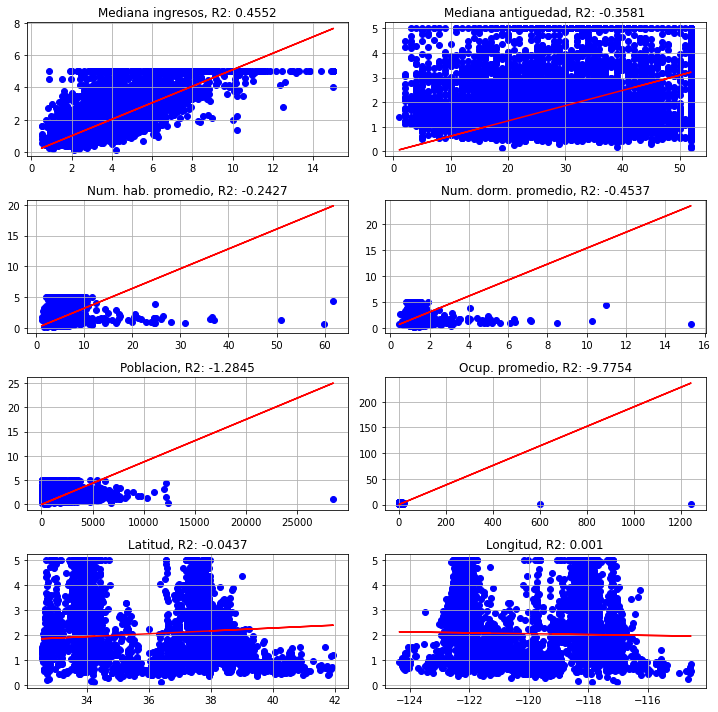

In [287]:
trainx, testx, trainy, testy = train_test_split(df[df.columns[0:8]],df["Mediana precio"], train_size=0.7)
scores = {}
fig = plt.figure(figsize=(10, 10))
for i in range(trainx.shape[1]):
    Lr = linear_model.LinearRegression(fit_intercept=False)
    Lr.fit(np.array(trainx[trainx.columns[i]]).reshape(-1,1), trainy)
    scores[trainx.columns[i]] = r2_score(testy, Lr.predict(np.array(testx[testx.columns[i]]).reshape(-1,1)))

    plt.subplot(4, 2, i+1)
    plt.title(testx.columns[i] + ", R2: "  + str(round(r2_score(testy, Lr.predict(np.array(testx[testx.columns[i]]).reshape(-1,1))),4)))
    plt.scatter(testx[testx.columns[i]], testy, color="blue")
    plt.plot(testx[testx.columns[i]], testx[testx.columns[i]] * Lr.coef_[0] + Lr.intercept_, color='red')
    plt.grid()

plt.tight_layout()
plt.show()

El diagrama de puntos representa en el eje x la característica con la que tratamos, el eje y referencia a la mediana del precio de cada grupo de viviendas, y la recta esta constituida por los coeficientes de la recta multiplicando los valores del eje x.

Es bastante complicado imaginar una recta únicamente con la nube de puntos pues no parecen demasiado relacionados los datos. Sin embargo, gracias a los cáculos pudimos hallar la recta y con ella podemos comprobar que casi todas las tendencias son crecientes. Las características que no afectan tanto al precio son, como es lógico, la latitud y longitud, ya que al indicar únicamente dónde se localiza el mapa con coordenadas, es normal que no tenga una relacional lineal con el precio.

In [288]:
max(scores, key=scores.get)

'Mediana ingresos'

Mediana ingresos, es la característica con mayor "score", y por tanto la mejor ajustada. Esto significa que probablemente, la variable de la que más depende el precio de las viviendas, es el ingreso medio en esa vivienda.

### Estimación por regresión lineal con diferente número de características
##### En este segundo apartado, utilizando los cálculos del anterior apartado, ordenamos las características/columnas según el "score" más bajo. La idea es entrenar un mismo modelo lineal, primero con la primera variable, luego se le añade la segunda, y así hasta que se haya entrenado con todas las variables, viendo como evoluciona el error cuadrático.

De forma teórica, el error representa que tanto se diferencian los valores de la recta, de los valores reales, por lo tanto mientras menor sea el error más cercano está a los valores reales. Que sea al cuadrado es una forma de amplificar el error que existe.

In [289]:
sortedscores = dict(sorted(scores.items(), key=lambda item: item[1], reverse=True))
RMSEs = {}
Lr = linear_model.LinearRegression(fit_intercept=False)
features=[]
for i in sortedscores.keys():
    features.append(i)
    Lr.fit(trainx[features], trainy)
    RMSEs[i] = mean_squared_error(testy, Lr.predict(np.array(testx[features])), squared=False)
pd.DataFrame.from_dict(RMSEs, orient="index", columns=["RMSE de cada característica acumulada"])

C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Line

,RMSE de cada característica acumulada
Mediana ingresos,0.865416
Longitud,0.843377
Latitud,0.828016
Num. hab. promedio,0.823936
Mediana antiguedad,0.796263
Num. dorm. promedio,0.777990
Poblacion,0.778167
Ocup. promedio,0.777865


En el dataframe que acabo de crear se puede observar como conforme se añaden características el error disminuye. A continuación lo visualizo en una gráfica para estudiarlo mejor:

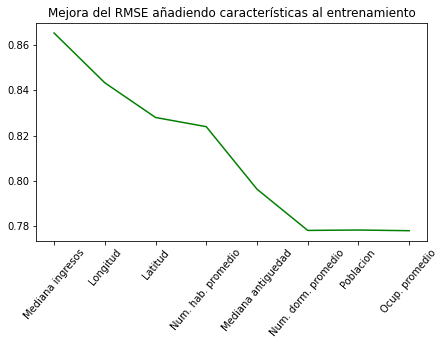

In [290]:
fig = plt.figure(figsize=(7, 4))
plt.plot(RMSEs.values(), color="green")
plt.title("Mejora del RMSE añadiendo características al entrenamiento")
plt.xticks(range(len(RMSEs)), list(RMSEs.keys()), rotation=50)
plt.show()

Como se puede observar, el número de habitantes de los hogares no mejoro demasiado el ajuste a los datos esto se debe a que, como es lógico, no se tiene en cuenta cuantas personas van a vivir en una casa para decidir su precio, sino cuantas podrían. Por otro lado, los peores grupos prácticamente no lo cambiaron. Sin embargo, la antiguedad mejoro considreablemente el error junto al número de dormitorios, estos factores sí se tienen en cuenta a la hora de decidir el perecio de una casa, es por ello que tienen más peso.

###  Estimación por regresión lineal con regularización estimando el valor de λ
##### En este último apartado volvemos a dividir el conjunto de entrenamiento en uno de entrenamiento y otro de validación. El objetivo del apartado es encontrar el mejor Lambda para los modelos Lasso y Ridge, para ello, los entrena con un conjunto de lambdas con el conjunto de entrenamiento y validación. El mejor modelo lineal se contrastará con el conjunto test para revisar si es eficaz.

Tanto con Ridge como con Lasso les daremos un conjunto de lambdas para probar, los visualizaremos y escogeremos el mejor para porbar con un test.
Primero con Ridge:

In [292]:
Lambdas = [0.01,0.1,0.5,1,2,5,10,15,50,70,100]
RMSEs = {}
trainx2, validationx, trainy2, validationy = train_test_split(trainx,trainy, train_size=0.7)
for i in Lambdas:
    Lr = linear_model.Ridge(fit_intercept=False, alpha=i)
    Lr.fit(trainx2, trainy2)
    RMSEs[i] = mean_squared_error(validationy, Lr.predict(validationx), squared=False)
pd.DataFrame.from_dict(RMSEs, orient="index", columns=["RMSE de cada lambda"])

,RMSE de cada lambda
0.01,0.770151
0.10,0.770153
0.50,0.770161
1.00,0.770172
2.00,0.770194
5.00,0.770259
10.00,0.770368
15.00,0.770478
50.00,0.771257
70.00,0.771699


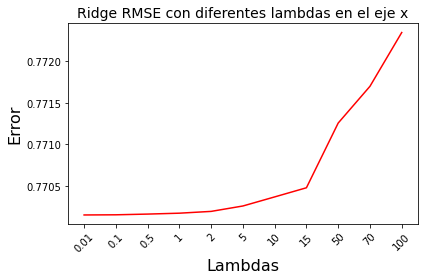

In [293]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(RMSEs.values(), color="red")
ax.set_xlabel('Lambdas', fontsize=16)
ax.set_ylabel('Error', fontsize=16)
ax.set_title("Ridge RMSE con diferentes lambdas en el eje x", fontsize=14)
plt.xticks(range(len(RMSEs)), list(RMSEs.keys()), rotation=45)
plt.show()

A partir de Lambdas mayores de 10 el error aumenta un poco, debido a la escala de la gráfica para que se dispara pero no es el caso. Que aumente se puede deber a que para el conjunto de datos actual, la regularización que añade Ridge a la ecuación no es útil.

In [294]:

Lr = linear_model.Ridge(fit_intercept=False, alpha=min(RMSEs, key=RMSEs.get))
Lr.fit(trainx2, trainy2)

print("El mejor lambda en Ridge es: " + str(min(RMSEs, key=RMSEs.get)) + " Con un error en test de: " + str(mean_squared_error(testy, Lr.predict(testx), squared=False)))


El mejor lambda en Ridge es: 0.01 Con un error en test de: 0.7758966572777845


Haber dividido los datos para probar en validación y test da una alta seguridad de que es un buen ajuste al probar el mejor lambda y obteniendo un buen resultado, como es el caso.

Ahora con Lasso:

In [295]:
Lambdas = [0.01,0.1,0.5,1,2,5,10,15,50,70,100]
RMSEs = {}
fig = plt.figure(figsize=(10, 10))

trainx2, validationx, trainy2, validationy = train_test_split(trainx,trainy, train_size=0.7)
for i in Lambdas:
    Lr = linear_model.Lasso(fit_intercept=False, alpha=i)
    Lr.fit(trainx2, trainy2)
    RMSEs[i] = mean_squared_error(validationy, Lr.predict(validationx), squared=False)

pd.DataFrame.from_dict(RMSEs, orient="index", columns=["MSE de cada lambda"])

C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+03, tolerance: 5.613e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.531e+02, tolerance: 5.613e+00
  model = cd_fast.enet_coordinate_descent(


,MSE de cada lambda
0.01,0.808902
0.10,0.804146
0.50,0.847248
1.00,0.966979
2.00,1.149098
5.00,1.152055
10.00,1.160306
15.00,1.172646
50.00,1.359196
70.00,1.526485


<Figure size 720x720 with 0 Axes>

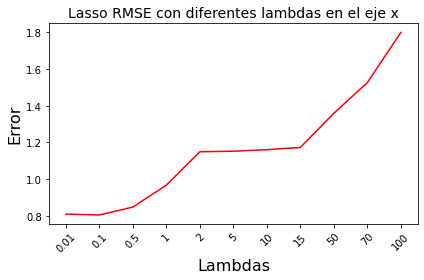

In [296]:
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(RMSEs.values(), color="red")
ax.set_xlabel('Lambdas', fontsize=16)
ax.set_ylabel('Error', fontsize=16)
ax.set_title("Lasso RMSE con diferentes lambdas en el eje x", fontsize=14)
plt.xticks(range(len(RMSEs)), list(RMSEs.keys()), rotation=45)
plt.show()

En esta evolución podemos apreciar como aparentemente se mueve más por mesetas el modelo de Lasso. Del lambda del 2 al 5 el error apenas cambia. Por otro lado, tenemos de vuelta que, a mayor lambda, mayor error.
Con este hecho podemos concluir que la regularización de Lasso tampoco es del todo efectiva.

In [297]:

Lr = linear_model.Lasso(fit_intercept=False, alpha=min(RMSEs, key=RMSEs.get))
Lr.fit(trainx2, trainy2)

print("El mejor lambda con Lasso es: " + str(min(RMSEs, key=RMSEs.get)) + " Con un error en test de: " + str(mean_squared_error(testy, Lr.predict(testx), squared=False)))

El mejor lambda con Lasso es: 0.1 Con un error en test de: 0.8515693347964934


C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.531e+02, tolerance: 5.613e+00
  model = cd_fast.enet_coordinate_descent(


En ambos casos el error es mejor cuando el lambda es menor y por tanto menos afecta la regularización al error cuadrático. De forma que se puede concluir que para este conjunto de datos el error cuadrático funciona mejor sin añadir regularizaciones a la fórmula.